# 01: Exploratory Data Analysis (EDA)
Project Statistika Inferensi TIF-SI-B 2024 Kelompok 8.

Anggota:
1. Ahmad Zaki (225150201111025)
2. Arion Syemael Siahaan (225150207111060)
3. Rayhan Egar Sadtya Nugraha (225150201111014)

## Data Read

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import kstest, shapiro, anderson

In [51]:
df = pd.read_csv('../data/SI-B Dataset 3 Project.csv')
df.head()

Image Name      meanR      meanG     meanB       stdR       stdG  \
0    ijo2pa1.jpg  17.395776  18.057278  4.548844  40.818315  42.747400   
1   ijo2pa10.jpg  17.048930  17.143965  4.285857  41.389466  42.116279   
2  ijo2pa100.jpg  19.957301  16.498584  5.082156  48.724795  40.816921   
3  ijo2pa101.jpg  19.713066  18.029258  4.707696  47.484912  43.629222   
4  ijo2pa102.jpg  17.383914  14.581238  4.632718  46.006665  38.900382   

        stdB     skewR     skewG     skewB  ...  ASM-1-90  dissimilarity-1-90  \
0  15.235375  2.080558  2.117612  4.194824  ...  0.011467            1.442313   
1  14.243516  2.185737  2.233318  4.195780  ...  0.008959            1.323746   
2  15.203335  2.169338  2.245723  3.863509  ...  0.009252            1.107091   
3  14.230307  2.135099  2.147982  3.987222  ...  0.008969            1.050541   
4  14.446719  2.417031  2.458251  3.903999  ...  0.009931            0.977596   

   contrast-1-135  energy-1-135  homogeneity-1-135  correlation-1-135  \
0       25.495182      0.094406           0.596762           0.993697   
1       19.458658      0.083524           0.601338           0.994707   
2       19.837377      0.084084           0.603311           0.994233   
3       17.983701      0.082048           0.596238           0.994426   
4       13.670599      0.087442           0.621051           0.994895   

   ASM-1-135  dissimilarity-1-135  class  Class  
0   0.008912             1.723876     11      1  
1   0.006976             1.618708     11      1  
2   0.007070             1.425450     11      1  
3   0.006732             1.375565     11      1  
4   0.007646             1.252951     11      1  

[5 rows x 81 columns]

In [52]:
numeric_feats = df.select_dtypes(include=['float64', 'int64'])
numeric_feats.drop(columns=['class', 'Class'], inplace=True)
numeric_feats

meanR      meanG     meanB       stdR       stdG       stdB  \
0     17.395776  18.057278  4.548844  40.818315  42.747400  15.235375   
1     17.048930  17.143965  4.285857  41.389466  42.116279  14.243516   
2     19.957301  16.498584  5.082156  48.724795  40.816921  15.203335   
3     19.713066  18.029258  4.707696  47.484912  43.629222  14.230307   
4     17.383914  14.581238  4.632718  46.006665  38.900382  14.446719   
...         ...        ...       ...        ...        ...        ...   
5651   9.639953  10.066067  3.723893  30.483106  31.889883  13.215059   
5652  13.668622  14.771024  4.213619  36.393775  38.963387  14.905458   
5653   8.400466   8.839484  3.206222  26.736850  28.164536  11.817830   
5654   6.854176   7.180244  2.669827  23.889681  25.155812  10.683938   
5655  14.702825  15.633670  4.717498  37.707117  40.000770  15.451875   

         skewR     skewG     skewB      kurR  ...  homogeneity-1-90  \
0     2.080558  2.117612  4.194824  2.786645  ...          0.661221   
1     2.185737  2.233318  4.195780  3.243245  ...          0.668268   
2     2.169338  2.245723  3.863509  3.069086  ...          0.677613   
3     2.135099  2.147982  3.987222  2.920590  ...          0.678148   
4     2.417031  2.458251  3.903999  4.259136  ...          0.694110   
...        ...       ...       ...       ...  ...               ...   
5651  2.992953  2.998821  4.248670  7.465886  ...          0.731947   
5652  2.582813  2.486990  4.489599  5.639969  ...          0.762744   
5653  3.006128  2.996293  4.830452  7.515368  ...          0.724399   
5654  3.349365  3.382105  5.157558  9.783128  ...          0.678691   
5655  2.359625  2.314493  4.277625  4.170651  ...          0.716232   

      correlation-1-90  ASM-1-90  dissimilarity-1-90  contrast-1-135  \
0             0.994862  0.011467            1.442313       25.495182   
1             0.995726  0.008959            1.323746       19.458658   
2             0.996042  0.009252            1.107091       19.837377   
3             0.996255  0.008969            1.050541       17.983701   
4             0.996391  0.009931            0.977596       13.670599   
...                ...       ...                 ...             ...   
5651          0.996868  0.011226            0.725780        7.150027   
5652          0.998743  0.012265            0.689985        6.195821   
5653          0.997622  0.011560            0.810050        8.340865   
5654          0.995737  0.009698            0.917355        8.882472   
5655          0.998023  0.011949            0.833826        8.839826   

      energy-1-135  homogeneity-1-135  correlation-1-135  ASM-1-135  \
0         0.094406           0.596762           0.993697   0.008912   
1         0.083524           0.601338           0.994707   0.006976   
2         0.084084           0.603311           0.994233   0.007070   
3         0.082048           0.596238           0.994426   0.006732   
4         0.087442           0.621051           0.994895   0.007646   
...            ...                ...                ...        ...   
5651      0.092747           0.656495           0.995965   0.008602   
5652      0.099329           0.710111           0.998233   0.009866   
5653      0.092990           0.640558           0.996755   0.008647   
5654      0.086371           0.599516           0.994767   0.007460   
5655      0.095925           0.648261           0.997388   0.009202   

      dissimilarity-1-135  
0                1.723876  
1                1.618708  
2                1.425450  
3                1.375565  
4                1.252951  
...                   ...  
5651             0.936422  
5652             0.839363  
5653             1.070910  
5654             1.164045  
5655             1.049950  

[5656 rows x 78 columns]

In [53]:
nonnumeric_feats = df.select_dtypes(include=['object'])
nonnumeric_feats

Image Name
0       ijo2pa1.jpg
1      ijo2pa10.jpg
2     ijo2pa100.jpg
3     ijo2pa101.jpg
4     ijo2pa102.jpg
...             ...
5651   morotk79.jpg
5652    morotk8.jpg
5653   morotk80.jpg
5654   morotk81.jpg
5655    morotk9.jpg

[5656 rows x 1 columns]

In [54]:
df_target = df['Class'].copy()
df_data = df.drop(columns=['class', 'Class', 'correlation-1-0'], axis=1).copy()

In [55]:
df_data.shape

(5656, 78)

## Train test split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=.2, random_state=42)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [57]:
id_train = X_train['Image Name'].copy()
X_train.drop(columns=['Image Name'], inplace=True)

id_test = X_test['Image Name'].copy()
X_test.drop(columns=['Image Name'], inplace=True)

### Note
- Untuk data training dan target training, masing-masing menggunakan: X_train dan y_train
- Untuk data testing dan target testing, masing-masing menggunakan: X_test dan y_test
- Identifier untuk training dan testing, masing-masing menggunakan: id_train dan id_test

## Data Distribution

### Target Variable

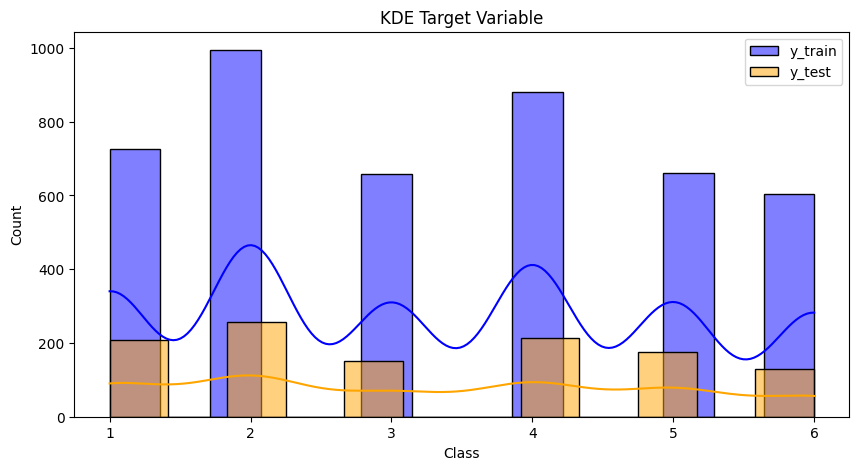

In [58]:
plt.figure(figsize=(10, 5))
sns.histplot(y_train, x='Class', label='y_train', kde=True, color='blue', alpha=0.5) 
sns.histplot(y_test, x='Class', label='y_test', kde=True, color='orange', alpha=0.5) 

plt.title('KDE Target Variable')
plt.legend()
plt.show()

Grafik di atas menunjukkan distribusi variabel target berdasarkan kelas untuk data latih (y_train) dan data uji (y_test). Histogram yang tumpang tindih dilengkapi dengan kurva KDE (Kernel Density Estimate) untuk memperlihatkan distribusi yang lebih halus pada masing-masing subset data. Data latih digambarkan dengan warna biru, sementara data uji digambarkan dengan warna oranye. 

Terlihat bahwa distribusi kelas pada data latih dan data uji cukup konsisten, menunjukkan bahwa proses pembagian data tidak menghasilkan bias yang signifikan antara kedua subset ini. Hal ini penting untuk memastikan bahwa model yang akan dilatih tidak akan mendapatkan preferensi berlebih pada salah satu kelas, sehingga evaluasi performa pada data uji dapat mencerminkan generalisasi model dengan lebih baik.


### Feature Variable

In [59]:
print(1 if X_train.shape[1]==X_test.shape[1] else 0)

1


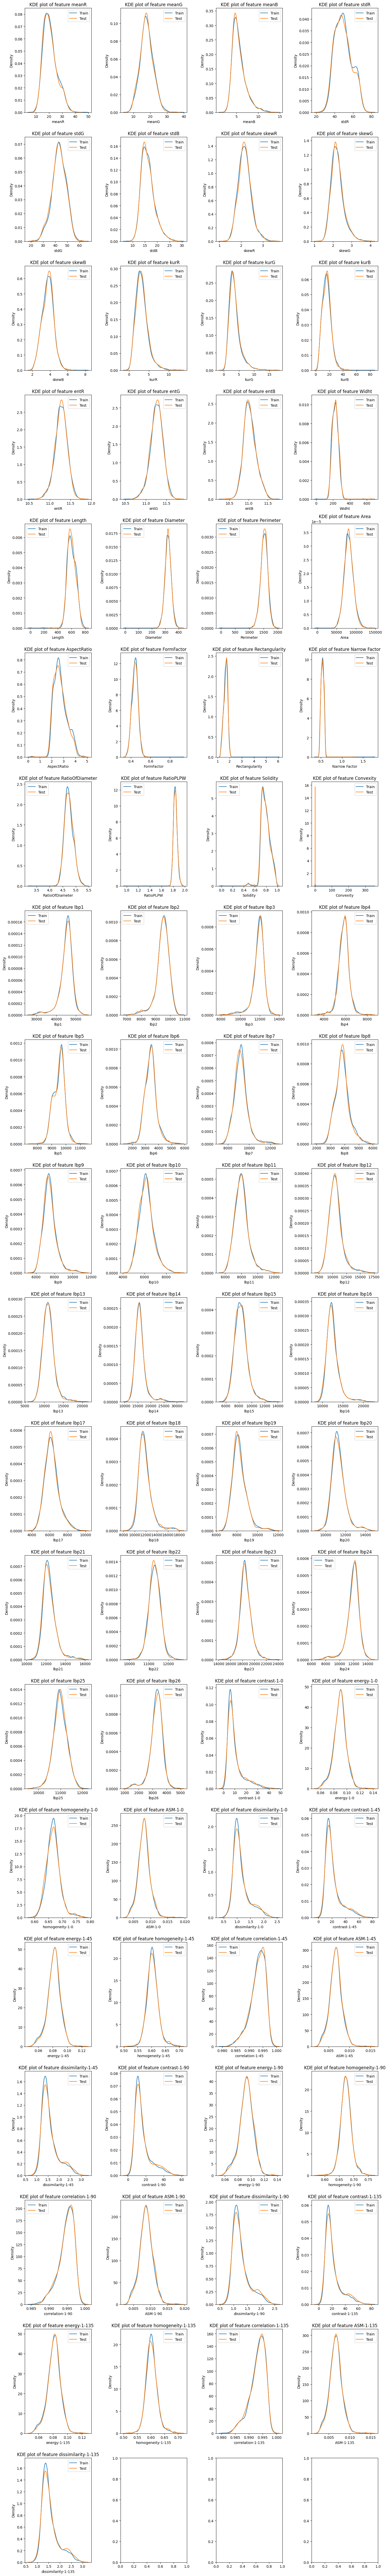

In [60]:
num_cols = 4
num_rows = len(X_train.columns) // num_cols + (len(X_train.columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, feature in enumerate(X_train.columns):
    sns.kdeplot(X_train[feature], label='Train', ax=axes[i])
    sns.kdeplot(X_test[feature], label='Test', ax=axes[i])
    axes[i].set_title(f'KDE plot of feature {feature}')
    axes[i].legend()

plt.tight_layout()
plt.show()

Grafik di atas menampilkan distribusi variabel fitur dalam dataset, baik untuk data latih (X_train) maupun data uji (X_test), yang digambarkan dengan kurva KDE (Kernel Density Estimate). Setiap subplot merepresentasikan distribusi satu fitur, dengan kurva oranye untuk data uji dan kurva biru untuk data latih. Melalui visualisasi ini, dapat dilihat bahwa sebagian besar fitur memiliki distribusi yang serupa antara data latih dan data uji, yang mengindikasikan bahwa proses pemisahan data tidak menyebabkan perubahan besar dalam karakteristik fitur antar subset. Hal ini penting untuk memastikan bahwa distribusi pada data latih tetap representatif terhadap data uji, sehingga model yang dilatih dapat memiliki performa yang baik pada data yang belum pernah dilihat.

## Data Normality

### Assess Skewness and Kurtosis

In [61]:
from scipy.stats import skew, kurtosis

skew_kurtosis_results = {
    'Feature': [],
    'Skew': [],
    'Kurtosis': []
}

for feature in X_train.columns:
    skew_value = skew(X_train[feature])
    kurtosis_value = kurtosis(X_train[feature])

    skew_kurtosis_results['Feature'].append(feature)
    skew_kurtosis_results['Skew'].append(skew_value)
    skew_kurtosis_results['Kurtosis'].append(kurtosis_value)

skew_kurtosis_df = pd.DataFrame(skew_kurtosis_results)
skew_kurtosis_df

Feature      Skew  Kurtosis
0                 meanR  0.626588  0.078320
1                 meanG  0.198008  0.123010
2                 meanB  1.291117  2.297441
3                  stdR  0.301875 -0.615722
4                  stdG -0.242227  0.029675
..                  ...       ...       ...
72         energy-1-135 -0.237864  0.549756
73    homogeneity-1-135  0.624264  1.946222
74    correlation-1-135 -0.960483  0.825887
75            ASM-1-135  0.188446  0.690410
76  dissimilarity-1-135  1.298978  1.448763

[77 rows x 3 columns]

In [62]:
skew_kurtosis_df['Skew'].describe()

count    77.000000
mean      1.110678
std       5.514544
min      -4.041650
25%      -0.213892
50%       0.499697
75%       1.161419
max      46.497255
Name: Skew, dtype: float64

In [63]:
skew_kurtosis_df['Kurtosis'].describe()

count      77.000000
mean       38.107109
std       265.476134
min        -0.615722
25%         0.706968
50%         1.632316
75%         3.385126
max      2320.609475
Name: Kurtosis, dtype: float64

1. Skewness: Skewness menunjukkan simetri distribusi data. Nilai rata-rata skewness adalah sekitar 1.11, yang menunjukkan bahwa mayoritas fitur memiliki distribusi yang sedikit miring. Nilai skewness berkisar dari -4.04 (negatif, miring ke kiri) hingga 46.50 (positif, miring ke kanan). Sebagian besar fitur memiliki skewness di sekitar nol, yang mengindikasikan distribusi simetris, meskipun ada beberapa outlier dengan skewness tinggi.

2. Kurtosis: Kurtosis mengukur puncak atau kelancipan distribusi. Rata-rata kurtosis adalah sekitar 38.11, namun standar deviasi yang sangat tinggi (265.48) menunjukkan adanya variasi besar antar fitur. Nilai kurtosis berkisar dari -0.62 (distribusi lebih datar dari normal) hingga 2320.61 (distribusi sangat berpuncak). Ini mengindikasikan bahwa beberapa fitur memiliki distribusi yang sangat berpuncak atau lebih flat dari distribusi normal.

### Saphiro-Wilk test

In [64]:
from scipy.stats import shapiro
import pandas as pd

shapiro_test_results = {
    'Feature': [],
    'Statistic': [],
    'P-Value': [],
    'Normality': []
}

alpha = 0.05

for feature in X_train.columns:

    statistic, p_value = shapiro(X_train[feature])

    shapiro_test_results['Feature'].append(feature)
    shapiro_test_results['Statistic'].append(statistic)
    shapiro_test_results['P-Value'].append(p_value)

    if p_value < alpha:
        shapiro_test_results['Normality'].append('Not Normal')
    else:
        shapiro_test_results['Normality'].append('Potentially Normal')

shapiro_test_df = pd.DataFrame(shapiro_test_results)
shapiro_test_df

Feature  Statistic       P-Value   Normality
0                 meanR   0.970889  2.245860e-29  Not Normal
1                 meanG   0.997077  1.111498e-07  Not Normal
2                 meanB   0.916384  1.546148e-44  Not Normal
3                  stdR   0.981409  6.324421e-24  Not Normal
4                  stdG   0.995531  1.586152e-10  Not Normal
..                  ...        ...           ...         ...
72         energy-1-135   0.991568  9.282738e-16  Not Normal
73    homogeneity-1-135   0.973057  2.159442e-28  Not Normal
74    correlation-1-135   0.942069  6.849875e-39  Not Normal
75            ASM-1-135   0.993322  1.065190e-13  Not Normal
76  dissimilarity-1-135   0.888533  3.073716e-49  Not Normal

[77 rows x 4 columns]

In [65]:
shapiro_test_df['Normality'].value_counts()

Normality
Not Normal    77
Name: count, dtype: int64

In [66]:
shapiro_test_df['P-Value'].describe()

count    7.700000e+01
mean     1.464389e-09
std      1.266475e-08
min      5.528652e-93
25%      1.546148e-44
50%      7.579339e-35
75%      7.807266e-21
max      1.111498e-07
Name: P-Value, dtype: float64

Kami melakukan uji Shapiro-Wilk dimana hasil menunjukkan bahwa seluruh fitur dalam data latih (sebanyak 77 fitur) memiliki hasil "Not Normal" untuk normalitas, berdasarkan kolom Normality. Hal ini didasarkan pada p-value yang dihasilkan dalam uji Shapiro-Wilk, di mana seluruh nilai p-value jauh di bawah threshold 0.05, dengan rata-rata sekitar 1.46×10-9

Distribusi p-value ini menunjukkan bahwa setiap fitur memiliki p-value yang sangat rendah (bahkan serendah 5.53×10-93), menunjukkan bahwa asumsi normalitas ditolak untuk setiap fitur. Artinya, fitur-fitur dalam dataset ini tidak mengikuti distribusi normal, yang mungkin memerlukan transformasi data lebih lanjut untuk pendekatan yang lebih baik dalam analisis statistik dan pengembangan model.

### Kolmorogov-Smirnov Test
With respect to each feature's mean and std

In [67]:
from scipy.stats import kstest, norm
import pandas as pd

ks_test_results = {
    'Feature': [],
    'Statistic': [],
    'P-Value': [],
    'Normality': []
}

for feature in X_train.columns:

    feature_mean = X_train[feature].mean()
    feature_std = X_train[feature].std()
    
    statistic, p_value = kstest(X_train[feature], 'norm', args=(feature_mean, feature_std))

    ks_test_results['Feature'].append(feature)
    ks_test_results['Statistic'].append(statistic)
    ks_test_results['P-Value'].append(p_value)

    alpha = 0.05
    if p_value < alpha:
        ks_test_results['Normality'].append('Not Normal')
    else:
        ks_test_results['Normality'].append('Potentially Normal')

ks_test_df = pd.DataFrame(ks_test_results)
ks_test_df

Feature  Statistic       P-Value           Normality
0                 meanR   0.063921  1.633789e-16          Not Normal
1                 meanG   0.022870  1.734075e-02          Not Normal
2                 meanB   0.096684  2.925756e-37          Not Normal
3                  stdR   0.042247  1.874697e-07          Not Normal
4                  stdG   0.019072  7.348174e-02  Potentially Normal
..                  ...        ...           ...                 ...
72         energy-1-135   0.035573  2.075157e-05          Not Normal
73    homogeneity-1-135   0.049640  3.971837e-10          Not Normal
74    correlation-1-135   0.078139  1.797307e-24          Not Normal
75            ASM-1-135   0.030952  3.364754e-04          Not Normal
76  dissimilarity-1-135   0.139544  2.586457e-77          Not Normal

[77 rows x 4 columns]

In [68]:
ks_test_df['Normality'].value_counts()

Normality
Not Normal            74
Potentially Normal     3
Name: count, dtype: int64

In [69]:
ks_test_df['P-Value'].describe()

count    7.700000e+01
mean     7.250726e-03
std      3.149520e-02
min      0.000000e+00
25%      1.402479e-27
50%      1.463506e-10
75%      1.312301e-05
max      1.955287e-01
Name: P-Value, dtype: float64

Kami melakukan uji Kolmogorov-Smirnov dimana hasil menunjukkan bahwa dari 77 fitur yang diuji, sebanyak 74 fitur dikategorikan sebagai "Not Normal", sementara 3 fitur memenuhi syarat "Potentially Normal". Kategori ini ditentukan berdasarkan p-value dengan threshold 0.05.

Rincian statistik dari kolom p-value menunjukkan bahwa rata-rata p-value adalah sekitar 7.25×10−3, dengan sebagian besar nilai p-value berada di bawah threshold normalitas, yang mengindikasikan bahwa mayoritas fitur tidak mengikuti distribusi normal. P-value minimum adalah 0, sedangkan maksimum mencapai sekitar 0.195, yang merupakan salah satu dari beberapa fitur yang dianggap "Potentially Normal".

Secara keseluruhan, hasil ini menunjukkan bahwa sebagian besar fitur dalam dataset ini tidak memiliki distribusi normal, sehingga mungkin diperlukan transformasi untuk meningkatkan normalitas.


## Data Transformation
Uses Yeo-Johnson transformation. Kak Dzaki said so, plus it can helps mitigate the effect of extreme tail/kurtosis and skewness.

In [70]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer

X_train_transformed = {}
X_test_transformed = {}

for feature in X_train.columns:
    try:
        pt = PowerTransformer(method='yeo-johnson', standardize=True)
        
        X_train_transformed[feature] = pt.fit_transform(X_train[[feature]]).flatten()
        X_test_transformed[feature] = pt.transform(X_test[[feature]]).flatten()
        
    except Exception as e:
        print(f"Could not transform {feature}: {e}")

X_train_transformed = pd.DataFrame(X_train_transformed, index=X_train.index)
X_test_transformed = pd.DataFrame(X_test_transformed, index=X_test.index)

c:\Users\AHMAD ZAKI\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\AHMAD ZAKI\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\AHMAD ZAKI\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [71]:
X_train_transformed.columns

Index(['meanR', 'meanG', 'meanB', 'stdR', 'stdG', 'stdB', 'skewR', 'skewG',
       'skewB', 'kurR', 'kurG', 'kurB', 'entR', 'entG', 'entB', 'Widht',
       'Length', 'Diameter', 'Perimeter', 'Area', 'AspectRatio', 'FormFactor',
       'Rectangularity', 'Narrow Factor', 'RatioOfDiameter', 'RatioPLPW',
       'Solidity', 'Convexity', 'lbp1', 'lbp2', 'lbp3', 'lbp4', 'lbp5', 'lbp6',
       'lbp7', 'lbp8', 'lbp9', 'lbp10', 'lbp11', 'lbp12', 'lbp13', 'lbp14',
       'lbp15', 'lbp16', 'lbp17', 'lbp18', 'lbp19', 'lbp20', 'lbp21', 'lbp22',
       'lbp23', 'lbp24', 'lbp25', 'lbp26', 'contrast-1-0', 'energy-1-0',
       'homogeneity-1-0', 'ASM-1-0', 'dissimilarity-1-0', 'contrast-1-45',
       'energy-1-45', 'homogeneity-1-45', 'correlation-1-45', 'ASM-1-45',
       'dissimilarity-1-45', 'contrast-1-90', 'energy-1-90',
       'homogeneity-1-90', 'correlation-1-90', 'ASM-1-90',
       'dissimilarity-1-90', 'contrast-1-135', 'energy-1-135',
       'homogeneity-1-135', 'correlation-1-135', 'ASM-1-13

Kami menggunakan metode Yeo-Johnson untuk mentransformasi setiap fitur dalam data latih (X_train) dan data uji (X_test). Metode ini diterapkan untuk mengurangi skewness pada distribusi fitur-fitur, sehingga mendekati distribusi normal. Proses ini dilakukan dengan melakukan fitting dan transformasi pada data latih, lalu menerapkan transformasi yang sama pada data uji agar tetap konsisten.

## Post-Data Transformation

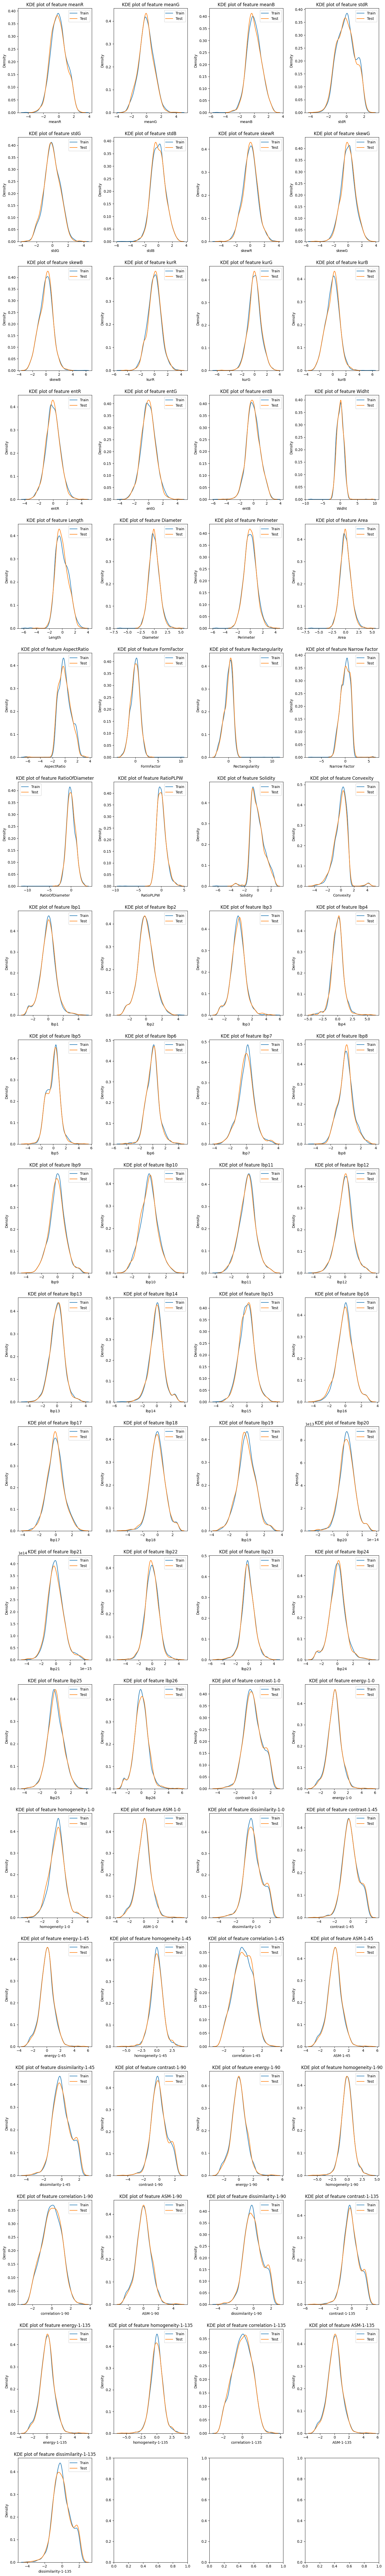

In [72]:
num_cols = 4
num_rows = len(X_train_transformed.columns) // num_cols + (len(X_train_transformed.columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, feature in enumerate(X_train_transformed.columns):
    sns.kdeplot(X_train_transformed[feature], label='Train', ax=axes[i])
    sns.kdeplot(X_test_transformed[feature], label='Test', ax=axes[i])
    axes[i].set_title(f'KDE plot of feature {feature}')
    axes[i].legend()

plt.tight_layout()
plt.show()

Grafik di atas menunjukkan distribusi fitur-fitur dalam data latih (X_train_transformed) dan data uji (X_test_transformed) setelah dilakukan transformasi Yeo-Johnson. Setiap subplot menampilkan kurva KDE untuk satu fitur. Hasil transformasi menunjukkan bahwa distribusi sebagian besar fitur menjadi lebih simetris dan mendekati bentuk distribusi normal, dengan kurva dari data latih dan uji yang hampir tumpang tindih. Ini menunjukkan keberhasilan transformasi dalam mengurangi skewness pada data, sehingga fitur-fitur ini sekarang lebih sesuai untuk digunakan dalam model yang sensitif terhadap distribusi data normal.

### Recheck Skew and Kurtosis

In [73]:
skew_kurtosis_results_after = {
    'Feature': [],
    'Skew': [],
    'Kurtosis': []
}

for feature in X_train_transformed.columns:
    skew_value = skew(X_train_transformed[feature])
    kurtosis_value = kurtosis(X_train_transformed[feature])

    skew_kurtosis_results_after['Feature'].append(feature)
    skew_kurtosis_results_after['Skew'].append(skew_value)
    skew_kurtosis_results_after['Kurtosis'].append(kurtosis_value)

skew_kurtosis_after_df = pd.DataFrame(skew_kurtosis_results_after)
skew_kurtosis_after_df

Feature      Skew  Kurtosis
0                 meanR  0.001079 -0.227533
1                 meanG  0.001815  0.059269
2                 meanB -0.005668  0.231935
3                  stdR -0.005410 -0.594571
4                  stdG -0.009422 -0.111099
..                  ...       ...       ...
72         energy-1-135  0.013690  0.599979
73    homogeneity-1-135 -0.048545  1.247328
74    correlation-1-135 -0.074936 -0.506479
75            ASM-1-135 -0.008452  0.481669
76  dissimilarity-1-135  0.034462  0.058861

[77 rows x 3 columns]

In [79]:
skew_kurtosis_comparison_df = pd.DataFrame(
    {
        'Feature' : X_train_transformed.columns,
        'Skew Before': skew_kurtosis_df['Skew'],
        'Skew After': skew_kurtosis_after_df['Skew'],
        'Kurtosis Before': skew_kurtosis_df['Kurtosis'],
        'Kurtosis After': skew_kurtosis_after_df['Kurtosis'],
        'Delta Skew': abs(skew_kurtosis_df['Skew'] - skew_kurtosis_after_df['Skew']),
        'Delta Kurtosis': abs(skew_kurtosis_df['Kurtosis'] - skew_kurtosis_after_df['Kurtosis'])
    }
)

In [81]:
skew_kurtosis_comparison_df

Feature  Skew Before  Skew After  Kurtosis Before  \
0                 meanR     0.626588    0.001079         0.078320   
1                 meanG     0.198008    0.001815         0.123010   
2                 meanB     1.291117   -0.005668         2.297441   
3                  stdR     0.301875   -0.005410        -0.615722   
4                  stdG    -0.242227   -0.009422         0.029675   
..                  ...          ...         ...              ...   
72         energy-1-135    -0.237864    0.013690         0.549756   
73    homogeneity-1-135     0.624264   -0.048545         1.946222   
74    correlation-1-135    -0.960483   -0.074936         0.825887   
75            ASM-1-135     0.188446   -0.008452         0.690410   
76  dissimilarity-1-135     1.298978    0.034462         1.448763   

    Kurtosis After  Delta Skew  Delta Kurtosis  
0        -0.227533    0.625508        0.305853  
1         0.059269    0.196193        0.063741  
2         0.231935    1.296785        2.065507  
3        -0.594571    0.307285        0.021151  
4        -0.111099    0.232805        0.140773  
..             ...         ...             ...  
72        0.599979    0.251554        0.050223  
73        1.247328    0.672809        0.698894  
74       -0.506479    0.885547        1.332365  
75        0.481669    0.196898        0.208741  
76        0.058861    1.264515        1.389902  

[77 rows x 7 columns]

In [82]:
skew_kurtosis_comparison_df['Delta Skew'].describe()

count    77.000000
mean      1.642736
std       5.386056
min       0.010710
25%       0.323196
50%       0.854664
75%       1.264515
max      46.484521
Name: Delta Skew, dtype: float64

In [83]:
skew_kurtosis_comparison_df['Delta Kurtosis'].describe()

count      77.000000
mean       37.378028
std       265.126943
min         0.001993
25%         0.208741
50%         1.389902
75%         2.744832
max      2317.175295
Name: Delta Kurtosis, dtype: float64

Berdasarkan hasil pemeriksaan ulang pada perubahan nilai skewness dan kurtosis sebelum dan setelah transformasi, kami mendapatkan hasil sebagai berikut:
1. Delta Skew: Nilai rata-rata perubahan (Delta) skewness adalah sekitar 1.64, menunjukkan adanya pengurangan rata-rata pada skewness dari berbagai fitur. Nilai delta skew berkisar dari 0.01 hingga 46.48, dengan sebagian besar fitur memiliki perubahan antara 0.32 hingga 1.26 (rentang kuartil 25-75). Ini menunjukkan bahwa transformasi Yeo-Johnson berhasil mengurangi skewness pada banyak fitur, menjadikannya lebih simetris.


2. Delta Kurtosis: Nilai rata-rata perubahan kurtosis adalah sekitar 37.38, dengan perubahan yang sangat bervariasi, mulai dari 0.001 hingga 2317.17. Standar deviasi yang tinggi menunjukkan bahwa beberapa fitur mengalami penurunan atau peningkatan kurtosis yang signifikan, meskipun sebagian besar fitur memiliki delta kurtosis antara 0.21 hingga 2.74 (rentang kuartil 25-75). Hal ini menunjukkan bahwa transformasi juga berhasil mengurangi atau meratakan puncak distribusi beberapa fitur, meskipun ada fitur tertentu yang mengalami perubahan yang ekstrem.

### Shapiro-Wilk Test

In [86]:
from scipy.stats import shapiro
import pandas as pd

shapiro_test_after_results = {
    'Feature': [],
    'Statistic': [],
    'P-Value': [],
    'Normality': []
}

alpha = 0.05

for feature in X_train_transformed.columns:

    statistic, p_value = shapiro(X_train_transformed[feature])

    shapiro_test_after_results['Feature'].append(feature)
    shapiro_test_after_results['Statistic'].append(statistic)
    shapiro_test_after_results['P-Value'].append(p_value)

    if p_value < alpha:
        shapiro_test_after_results['Normality'].append('Not Normal')
    else:
        shapiro_test_after_results['Normality'].append('Potentially Normal')

shapiro_test_after_df = pd.DataFrame(shapiro_test_after_results)
shapiro_test_after_df

Feature  Statistic       P-Value   Normality
0                 meanR   0.996408  5.369672e-09  Not Normal
1                 meanG   0.999148  2.524422e-02  Not Normal
2                 meanB   0.996926  5.453211e-08  Not Normal
3                  stdR   0.989929  1.964459e-17  Not Normal
4                  stdG   0.998789  2.019181e-03  Not Normal
..                  ...        ...           ...         ...
72         energy-1-135   0.994321  2.311202e-12  Not Normal
73    homogeneity-1-135   0.989413  6.384211e-18  Not Normal
74    correlation-1-135   0.993800  4.461900e-13  Not Normal
75            ASM-1-135   0.995185  4.441767e-11  Not Normal
76  dissimilarity-1-135   0.987168  7.227160e-20  Not Normal

[77 rows x 4 columns]

In [88]:
shapiro_test_after_df['Normality'].value_counts()

Normality
Not Normal    77
Name: count, dtype: int64

Hasil uji Shapiro-Wilk setelah transformasi menunjukkan bahwa seluruh fitur (77 fitur) masih dikategorikan sebagai "Not Normal". Hal ini didasarkan pada p-value yang dihasilkan untuk setiap fitur, yang semuanya berada di bawah threshold 0.05, menandakan bahwa fitur-fitur ini tidak memenuhi asumsi normalitas meskipun telah dilakukan transformasi Yeo-Johnson.

Transformasi Yeo-Johnson berhasil mengurangi skewness dan kurtosis, tetapi tampaknya tidak cukup untuk membuat distribusi fitur benar-benar normal sesuai dengan standar uji Shapiro-Wilk. Ini menunjukkan bahwa meskipun distribusi data telah diperbaiki, tetap ada perbedaan yang signifikan dari distribusi normal, yang mungkin dipertimbangkan dalam pemilihan model atau teknik pemrosesan data lanjutan.


### Kolmogorov-Smirnov Test
With respect to feature's mean and std

In [91]:
ks_test_after_results = {
    'Feature': [],
    'Statistic': [],
    'P-Value': [],
    'Normality': []
}

for feature in X_train_transformed.columns:

    feature_mean = X_train_transformed[feature].mean()
    feature_std = X_train_transformed[feature].std()
    
    statistic, p_value = kstest(X_train_transformed[feature], 'norm', args=(feature_mean, feature_std))

    ks_test_after_results['Feature'].append(feature)
    ks_test_after_results['Statistic'].append(statistic)
    ks_test_after_results['P-Value'].append(p_value)

    alpha = 0.05
    if p_value < alpha:
        ks_test_after_results['Normality'].append('Not Normal')
    else:
        ks_test_after_results['Normality'].append('Potentially Normal')

ks_test_after_df = pd.DataFrame(ks_test_after_results)
ks_test_after_df

Feature  Statistic       P-Value           Normality
0                 meanR   0.022925  1.694447e-02          Not Normal
1                 meanG   0.013522  3.763990e-01  Potentially Normal
2                 meanB   0.018199  9.868915e-02  Potentially Normal
3                  stdR   0.036473  1.153420e-05          Not Normal
4                  stdG   0.013568  3.722599e-01  Potentially Normal
..                  ...        ...           ...                 ...
72         energy-1-135   0.027411  2.189240e-03          Not Normal
73    homogeneity-1-135   0.029211  8.693229e-04          Not Normal
74    correlation-1-135   0.022400  2.102852e-02          Not Normal
75            ASM-1-135   0.025184  6.327072e-03          Not Normal
76  dissimilarity-1-135   0.043300  8.286993e-08          Not Normal

[77 rows x 4 columns]

In [90]:
ks_test_after_df['Normality'].value_counts()

Normality
Not Normal            64
Potentially Normal    13
Name: count, dtype: int64

Kami melakukan uji Kolmogorov-Smirnov setelah transformasi dimana hasilnya menunjukkan bahwa dari 77 fitur yang diuji, 64 fitur masih dikategorikan sebagai "Not Normal", sementara 13 fitur berhasil memenuhi kriteria "Potentially Normal". Penentuan kategori ini didasarkan pada p-value dengan threshold 0.05. Jika p-value lebih besar dari 0.05, maka fitur dianggap memiliki distribusi yang mendekati normal. Transformasi Yeo-Johnson telah berhasil meningkatkan normalitas sebagian fitur, terlihat dari adanya 13 fitur yang dianggap "Potentially Normal" setelah transformasi. Namun, mayoritas fitur (64 fitur) tetap menunjukkan distribusi yang berbeda dari normal. 


### KDE Before and After Transformation

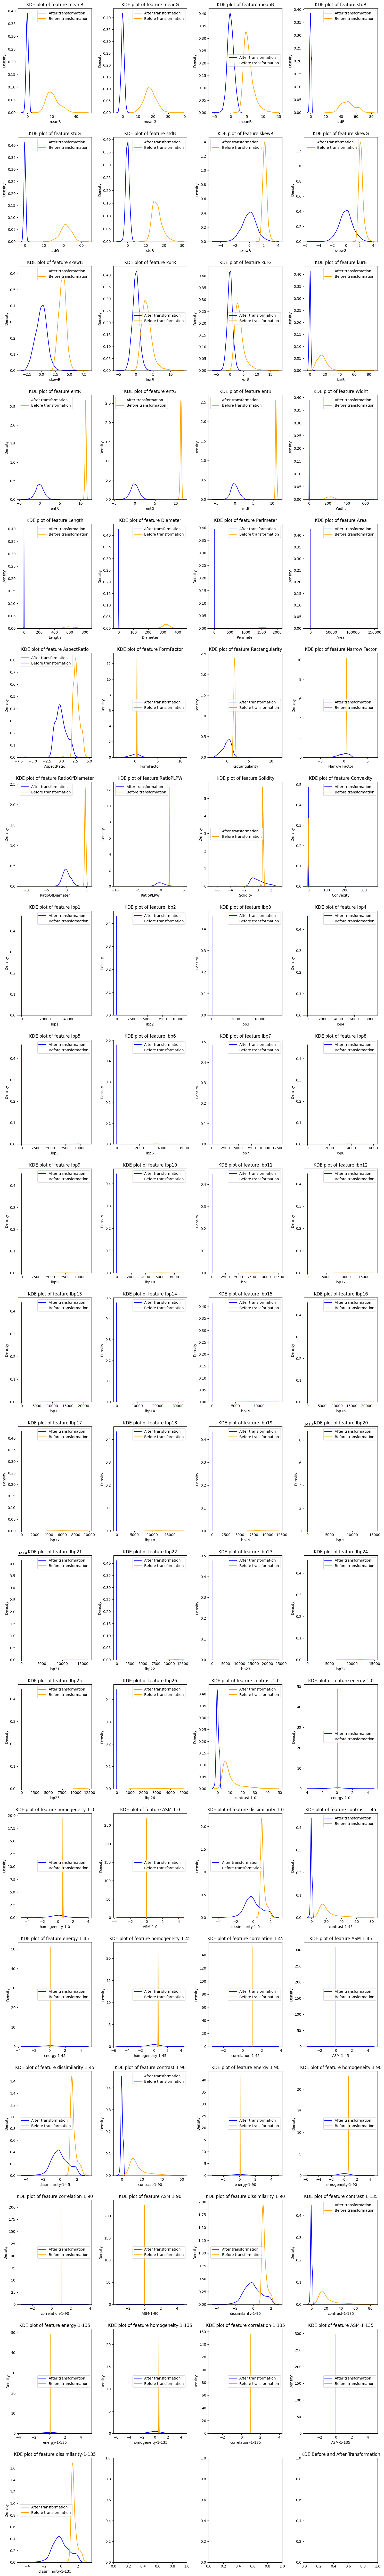

In [92]:
num_cols = 4
num_rows = len(X_train_transformed.columns) // num_cols + (len(X_train_transformed.columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, feature in enumerate(X_train_transformed.columns):
    sns.kdeplot(X_train_transformed[feature], label='After transformation', color='blue', ax=axes[i])
    sns.kdeplot(X_train[feature], label='Before transformation', color='orange', ax=axes[i])
    axes[i].set_title(f'KDE plot of feature {feature}')
    axes[i].legend()

plt.title('KDE Before and After Transformation')
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan perbandingan distribusi variabel fitur sebelum dan setelah transformasi Yeo-Johnson. Setiap subplot merepresentasikan satu fitur, dengan kurva oranye menunjukkan distribusi sebelum transformasi dan kurva biru setelah transformasi. Dari visualisasi ini, terlihat bahwa transformasi Yeo-Johnson berhasil mengubah sebagian besar fitur yang awalnya sangat miring (skewed) menjadi lebih simetris atau mendekati distribusi normal. Beberapa fitur mengalami perubahan signifikan dalam hal bentuk distribusi, sedangkan lainnya tetap menunjukkan karakteristik yang mirip dengan sebelum transformasi. 